# Module 3: MLP Assignment

In [1]:
# Problem Statement:
    
# Consider yourself to be Matt, who is a Deep Learning Engineer at a prestigious Wine firm. You are asked 
# to look into Wine fraud that has occurred recently at your firm. Let's see if Neural Networks can help 
# with this problem! 


# Requirements:
    
# You'll need to have the latest version of SciKit Learn (>0.18) installed! It is easily installable either 
# through pip or conda 


# Dataset Used:
    
# We will use the wine data set from the UCI Machine Learning Repository. It has various chemical 
# features of different wines, all grown in the same region in Italy, but the data is labeled by three 
# different possible cultivars

In [3]:
# A. Import the dataset, and add header columns with the names function 

# a. Check out the data 


# B. Split your data into training and testing sets using SciKitLearn'strain_test_split function 
# from model_selection

# a. It is highly recommended to scale your data. You must apply the same scaling to 
# the test set for meaningful results. Use the built-in Standard Scaler for 
# standardization. 

# b. Train your model using ScikitLearn’s estimator objects

# c. Create an instance of the model by defining the hidden_layer_sizes 

# d. Fit the training data to your model 


# C. Use predict () method to get predictions 

# a. Use SciKit-Learn's built in metrics to evaluate how well our model performed

# b. Extract the MLP weights and biases after training your model 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [7]:
#Importing DataSets
df = pd.read_csv("C:\\Users\\HP\OneDrive\\Desktop\\aI\\wine.data",header = None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# adding header columns
df.columns = ['Cultivar', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
                     'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 
                     'OD280/OD315_of_diluted_wines', 'Proline']

In [11]:
df.head()

,Cultivar,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [59]:
#checking for null values

df.isnull().sum()

Cultivar                        0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

In [60]:
df.describe()

,Cultivar,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cultivar                      178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [ ]:
#we are not good at chemistry but still lets try to analyse the data with some visualisatin tool

<AxesSubplot:xlabel='Alcohol', ylabel='Malic_acid'>

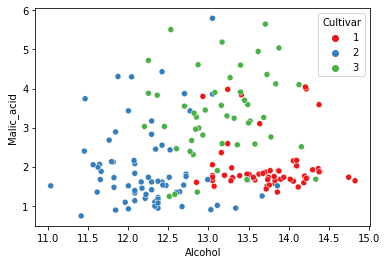

In [66]:
sns.scatterplot(x ="Alcohol",y = "Malic_acid", data = df, hue = "Cultivar",palette="Set1" )
# here we can see that cultivar 3 is using both malic acid and alcohol in a high amount compared to 1 and 2

<AxesSubplot:xlabel='Ash', ylabel='Alcalinity_of_ash'>

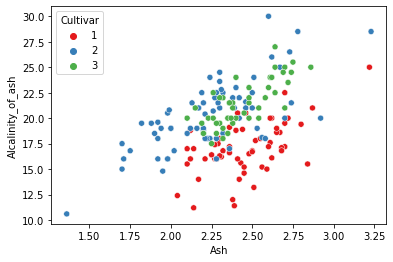

In [68]:
sns.scatterplot(x ="Ash",y = "Alcalinity_of_ash", data = df, hue = "Cultivar",palette="Set1" )
# here all that cultivators are using the Ash and alcalinity of ash in the same quantity

<AxesSubplot:xlabel='Magnesium', ylabel='Total_phenols'>

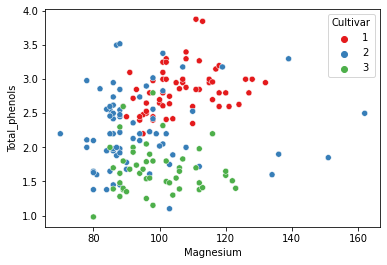

In [69]:
sns.scatterplot(x ="Magnesium",y = "Total_phenols", data = df, hue = "Cultivar",palette="Set1" )
#here we can see that all the cultivators are using Magnesium in a low quantity and total phenols 
#in a high quantity 

<AxesSubplot:xlabel='Flavanoids', ylabel='Nonflavanoid_phenols'>

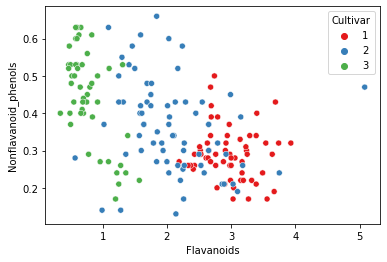

In [70]:
sns.scatterplot(x ="Flavanoids",y = "Nonflavanoid_phenols", data = df, hue = "Cultivar",palette="Set1" )

#we can see that cultivator 1 is using the flavanoids in a huge quantity and cultivator 1 is using the 
#nonflavanoid phenols in a huge quantity

<AxesSubplot:xlabel='Proanthocyanins', ylabel='Hue'>

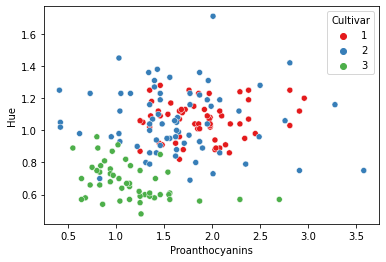

In [73]:
sns.scatterplot(x ="Proanthocyanins",y = "Hue", data = df, hue = "Cultivar",palette="Set1" )
# here 2 is using a much high level of hue and Proanthocyanins

<AxesSubplot:xlabel='OD280/OD315_of_diluted_wines', ylabel='Proline'>

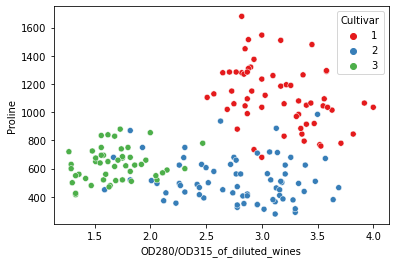

In [74]:
sns.scatterplot(x ="OD280/OD315_of_diluted_wines",y = "Proline", data = df, hue = "Cultivar",palette="Set1")

#and finally in this cluster we can that all the 3 cultivators are using diffrent level of OD315_of_diluted_wines 
#and Proline

In [ ]:
#so from the above charts we can see that there are significant diffrence between the 3 wine makers in 
#adding the the incrediants

In [12]:
#Now lets Separeate the dependent and independent data from our dataset

In [13]:
x = df.drop(columns = ["Cultivar"])
y = df["Cultivar"]

In [14]:
x.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Cultivar, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 46)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 13)
(18, 13)
(160,)
(18,)


In [21]:
#Now lets scale our data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
# Now we are going to import the MLPClassifier 

In [24]:
from sklearn.neural_network import MLPClassifier

In [30]:
#creating the model and training the model
#del model
model = MLPClassifier(hidden_layer_sizes = 100,activation = "relu",random_state = 47,max_iter=1000)
model.fit(x_train_scaled,y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=47)

In [31]:
y_pred = model.predict(x_test_scaled)

In [32]:
#evaluating the result
from sklearn.metrics import accuracy_score

In [35]:
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

94.44444444444444

In [55]:
# extracting the MLP weights and biases
for p,q in enumerate(model.coefs_):
    print(f"layer {p}, weights {q}" )
    print(f"layer {p}, biases {model.intercepts_[p]}")
    print("")

layer 0, weights [[-0.25465856  0.16789447  0.02199364 ...  0.06503697  0.2110937
   0.1596848 ]
 [-0.01844077  0.17988688 -0.15975599 ...  0.06507576 -0.07709144
   0.13094716]
 [ 0.03301781  0.1650413  -0.23448762 ... -0.03475716  0.29993248
  -0.04490345]
 ...
 [-0.06404813  0.00137427 -0.0978263  ...  0.01103081 -0.14566123
  -0.02986634]
 [-0.00881958  0.0433554   0.13298766 ... -0.0366748  -0.04480204
   0.13312798]
 [-0.1644939  -0.05382643  0.02594252 ...  0.27737465  0.0536258
   0.01855405]]
layer 0, biases [-0.06410168  0.12403559  0.29782756  0.22960271 -0.24091252  0.05984039
  0.28700099  0.4571401   0.21085555 -0.0294204   0.10298923 -0.02080766
  0.02252481  0.05252422  0.12480271  0.02007284  0.15256957 -0.0369804
  0.00497072  0.29549639  0.12428157  0.02760512 -0.07521251  0.18883483
  0.13095544  0.18432909  0.01762051  0.08833677  0.29832994  0.02432046
  0.19856384  0.23368349 -0.0207578  -0.1711691   0.14001902  0.0298156
 -0.05683761  0.33427508 -0.01324272  0.0